<a href="https://www.kaggle.com/code/kmljts/lightclearnet-demo?scriptVersionId=180934194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# LightClearNet Demo

Original Notebook: <https://www.kaggle.com/code/kmljts/lightclearnet>  
Kaggle Model Page: <https://www.kaggle.com/models/kmljts/lightclearnet>  

In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import torch
from torch import nn, optim
from torchvision import transforms

from PIL import Image
import os
import random

In [3]:
input_dir = '/kaggle/input/reside-6k/RESIDE-6K/test/hazy'
models_path = '/kaggle/input/lightclearnet/pytorch/7epochs-21.2462-85.50/1'

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [5]:
images = sorted(os.listdir(input_dir))

images[:10], len(images)

(['0001_0.8_0.2.jpg',
  '0002_0.8_0.08.jpg',
  '0003_0.8_0.2.jpg',
  '0004_0.9_0.12.jpg',
  '0006_0.85_0.08.jpg',
  '0007_0.9_0.16.jpg',
  '0009_0.8_0.16.jpg',
  '0010_0.95_0.16.jpg',
  '0011_0.95_0.16.jpg',
  '0014_0.8_0.12.jpg'],
 1000)

In [6]:
os.listdir(models_path)

['full-model-jit.pth', 'full-model.pth', 'state-dict.pth']

In [7]:
img_to_tensor = transforms.ToTensor()
tensor_to_img = transforms.ToPILImage()

In [8]:
# loading the model without model code
model = torch.jit.load(os.path.join(models_path, 'full-model-jit.pth')).to(device)
model.__class__.__name__ = model.original_name

# model = LightClearNet().to(device)
# model.load_state_dict(torch.load(os.path.join(models_path, 'state-dict.pth'), map_location=device))

model

LightClearNet(
  original_name=LightClearNet
  (enc_conv1): LightClearNet(original_name=Conv2d)
  (enc_bn1): LightClearNet(original_name=BatchNorm2d)
  (enc_conv2): LightClearNet(original_name=Conv2d)
  (enc_bn2): LightClearNet(original_name=BatchNorm2d)
  (enc_conv3): LightClearNet(original_name=Conv2d)
  (enc_bn3): LightClearNet(original_name=BatchNorm2d)
  (dec_conv1): LightClearNet(original_name=Conv2d)
  (dec_bn1): LightClearNet(original_name=BatchNorm2d)
  (dec_conv2): LightClearNet(original_name=Conv2d)
  (dec_bn2): LightClearNet(original_name=BatchNorm2d)
  (dec_conv3): LightClearNet(original_name=Conv2d)
)

In [9]:
def infer(img_path):
    img = Image.open(img_path)
    
    print(img_path)
    print(f'Image size: {img.size}')
    display(img)
    
    tensor = img_to_tensor(img).to(device)
    with torch.inference_mode():
        pred = model(tensor.unsqueeze(0)).squeeze(0)
    dehazed_img = tensor_to_img(pred)
    
    display(dehazed_img)

/kaggle/input/reside-6k/RESIDE-6K/test/hazy/0272_0.85_0.08.jpg
Image size: (548, 412)


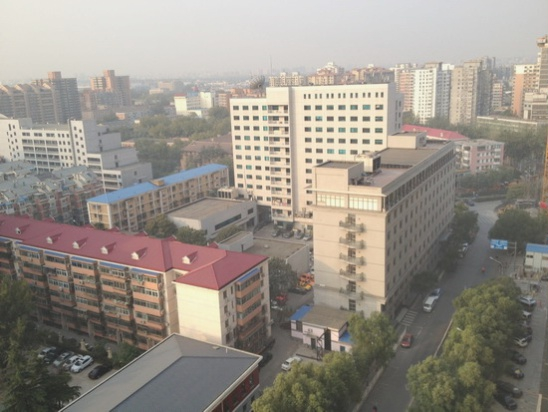

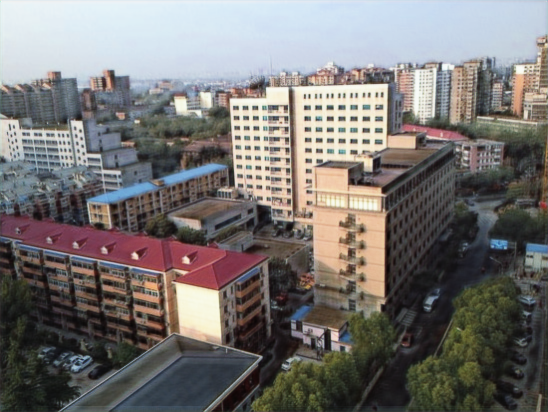

In [22]:
infer(os.path.join(input_dir, random.choice(images)))